# Solving Ordinary Differential Equations
# Session 7 Part 1:  Boundary Value Problems

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import scipy.integrate as integrate
import scipy.optimize as optimize

from IPython.html.widgets import *


/Users/mnaylor/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


--- 

# Refresher from last week: Initial Value Problems

Q. What sort of problems can `odeint` solve directly?

The examples we looked at last time included:

### A 1st order ODE
$$\frac{dy}{dt}=y(1-t)$$ 

with the boundary condition $y(t=0)=0.1$

### A set of coupled ODEs

$$\frac{dy}{dt}=-x$$

$$\frac{dx}{dt}=y$$      
      
with initial conditions $x(t=0)=1 \mbox{ and } y(t=0)=0$.  

### A second (or higher) order ODE

  $$\frac{d^2y}{dt^2} +2\frac{dy}{dt} +2y = \cos(2t)$$ 

with boundary conditions $y(t=0)=0$ and $y'(t=0)=0$

<div class="alert alert-block alert-info">
**NOTE:** 
All of these problems ONLY specified boundary conditions at t=0 !!! <p> This makes them "Initial Value Problems"</div>

---

# What are Boundary Value Problems and why can't `odeint` solve them directly?

An example of a boundary value problem is:

$$ \frac{d^2y}{dx^2}=x\sin x \quad y(0)=y(\pi)=0 $$

because we have specified BCs at 2 different times and/or places!

`odeint` requires that we specify ALL boundary conditions at the SAME time and/or place

### Question:
- What is the minimum order ODE required for a problem to be a boundary problem?

---
<img src="http://slideplayer.com/slide/1474150/4/images/3/Daniel+Baur+/+Numerical+Methods+for+Chemical+Engineers+/+BVP+and+PDE.jpg" align="RIGHT" width="50%">


# 2. Solution 1: The Shooting Method 
## (Can be used for non-linear problems)

These methods add another step into what you have seen using `odeint` in order to match the solution at 2 different places.

- Sometimes we need to solve problems where boundary conditions
    are not specified at the _same_ coordinate.
- One approach used to solve these problems is to set the BC(s) at one boundary, then make a first guess which extrapolates to the other BC(s) and then try and improve on the guess until the BC(s) are all matched.
- This is often more an art  than a science.

This approach is called the _shooting_ method and we will consider relatively simple cases. 


## 2.1 A motivating example for using the shooting method

We want to solve the problem $$\frac{d^2y}{dx^2}+y=0$$ 

but now with the boundary conditions

$$y(x=0)=1/2$$ 
$$y(x=\pi/3)=1/2$$

We first create 2 coupled equations from $$\frac{d^2y}{dx^2}+y=0$$

Let $$z = \dot{y}$$

Substituting this into the differential equation: 

$$\dot{z}=-y$$

So, if:

$$\mathbf{U} = \begin{pmatrix} y \\ z \end{pmatrix}$$

Therefore, the derivative is:
  $$\mathbf{\dot{U}} =  \begin{pmatrix}\dot{y} \\ \dot{z}  \end{pmatrix} =  \begin{pmatrix}z \\ -y \end{pmatrix} =  \begin{pmatrix} U[1] \\ -U[0] \end{pmatrix}$$

The boundary conditions are: $$y\, (x=0)=1/2$$ and $$y\, (x=\pi/3))=1/2$$ 

- We can directly set the BC $y(x=0)=1/2 $ 

- We can also specify a BC on the deivative of $y(x=0)$ really easily. (This is what we did before for the intial value problems.)

- The problem is that the boundary condition we need to satisfy is $y(x=\pi/3)=1/2$.

One way to do this is to try different values for the BC on $z(x=0)=\dot{y}(x=0)$ until we get the right answer at $y(x=\pi/3)$. 

Let's demonstrate this with widgets before we solve it formally:

In [3]:
## Define the function to return the derivatives
def derivatives(U, x):
    y = U[0]
    z = U[1]
    dy_dx = z
    dz_dx = -y
    return [dy_dx, dz_dx]

In [4]:
## Define a function that plots the trajectory as a function of varying the initial gradient
def pltShoot(dy_dx):

    x=np.linspace( 0 , np.pi/3 ) # times for plotting
    ic = np.array( [ 0.5, dy_dx ] ) # initial conditions

    U = integrate.odeint(derivatives, ic ,x)

    plt.plot(x, U)
    plt.axhline(y=0.5, linestyle='dashed')
    plt.axvline(x=np.pi/3, linestyle='dashed')
    plt.legend(('y', "dy_dx"), loc='lower left')
    plt.xlabel('x')
    plt.ylabel('y, dy/dt')

We need the boundary conditions $$y\, (x=0)=1/2$$ and $$y\, (x=\pi/3))=1/2$$ 

In [5]:
interact(pltShoot, dy_dx=FloatSlider(min=0.1,max=2) )

interactive(children=(FloatSlider(value=0.1, description='dy_dx', max=2.0, min=0.1), Output()), _dom_classes=(…

<function __main__.pltShoot(dy_dx)>

This is obviously a bit tedious so we want to automate it - that is what we do next!

# ASIDE: Click on the link to the [Finding the roots of a function notebook](Session 7 Part 2_FindingRootsOfAFuction_SOLUTIONS.ipynb)

---

## 2.2 The Shooting Method: Iteratively  applying `odeint` to match a distance BC

So can now put `integrate.odeint` and `optimize.fsolve`,  `optimize.minimize` or `optimize.basinhopping` together.

<div class="alert alert-block alert-info">
<b>REMINDER of the problem (COPIED FROM SECTION 3.1)</b>

We want to solve the problem $$\frac{d^2y}{dx^2}+y=0$$ 

but now with the boundary conditions

$$y(x=0)=1/2$$ 
$$y(x=\pi/3)=1/2$$

We first create 2 coupled equations from this second order differential,

Let $z = \dot{y}$

Therefore, $$\dot{z}=-y$$

So, if:

$$\mathbf{U} = \begin{pmatrix} y \\ z \end{pmatrix}$$

Therefore, the derivative is:
  $$\mathbf{\dot{U}} =  \begin{pmatrix}\dot{y} \\ \dot{z}  \end{pmatrix} =  \begin{pmatrix}z \\ -y \end{pmatrix} =  \begin{pmatrix} U[1] \\ -U[0] \end{pmatrix}$$


with the boundary conditions $$y\, (x=0)=1/2$$ and $$y\, (x=\pi/3))=1/2$$ 
</div>

Now we need to guess many values of the BC on $z(x=0)=\dot{y}(x=0)$ and find the one which matches the BC we actually know which is $y(x=\pi/3)=1/2$.

We let the optimisation algorithms do the work for finding the closest value!

The trick is to rearrange the problem to find roots - which we now know how to do. 
- Instead of searching for where the result of the integration equals 0.5, 
    - we rearrange it so that we look for where the integration minus 0.5 equals zero!    
    

So we can use `fsolve` assuming our initial guess is good enough.

Alternatively, we could use `minimize`.

Let's look at some code that does this below!

In [8]:
## Function that returns the coupled derivatives (needed for odeint)
def derivatives(U, x):
    y = U[0]
    z = U[1]
    dy_dx = z
    dz_dx = -y
    return [dy_dx, dz_dx]

### 2.2a Implementing the shooting method using `optimize.fmin()`

In [9]:
## Define the function that integrates the function and returns
## the difference between the trial solution and the boundary condtion
## of z_1(np.pi/3) = 0.5. 

def integrate_delta( init_vel ):
    """function to be used by fsolve which integrates 
    F from 0 to pi/3 using the initial condtion
    0.5, init_vel and subtracts 0.5"""
    
    ic = np.array([ 0.5 , init_vel ])  # The initial conditions

    x  = np.array([0, np.pi/3])     # The range x to integrate over
    
    U  = integrate.odeint(derivatives, ic ,x) # Use odeint to integrate
    
    diff = U[-1,0] - 0.5            # How close is y(pi/3)=U[0](pi/3) to 0.5?
    
    return diff                     # This is what we want to find the root of

In [39]:
# first guess for lambda (the dy_dx)
dy_dx_initial_Guess = 0.1

# Method 1: Use fsolve to find the ZERO value
dy_dx_initial_Optimal = optimize.fsolve( integrate_delta, dy_dx_initial_Guess)

print("Optimal initial gradient = ", str(dy_dx_initial_Optimal) )

Optimal initial gradient =  [0.28867516]


In [40]:
# Having found the value of lambda, now integrate and plot results
x=np.linspace(0,np.pi/3) # times for plotting

# Compute the final z values using the optimised lambda we found above
ic = np.array([ 0.5, dy_dx_initial_Optimal] ) # init cond

U_best = integrate.odeint(derivatives, ic, x)

# Plot the results
plt.plot(x,U_best[:,0],'k+-')
plt.plot(x,U_best[:,1],'b+-')
plt.axhline(y=0.5, linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y, dy_dx')
plt.title("Optimal Solution using roots")
plt.legend(('y=U_best[:,0]', 'z=U_best[:,1]'), loc='center right')

### 2.2b Implementing the shooting method using `optimize.minimize()`

In [15]:
def integrate_sqr(init_vel):
   """ function to be used by fmin which squares result 
   of function F ("module" variable) minus 0.5 at pi/3 
   when integrated from 0 with initial condtions 
   of 0.5, init_vel 
   """
   targetValue = 0.5
    
   ic = np.array([0.5, init_vel])  # The initial conditions
   x  = np.array([0, np.pi/3])     # The time range to integrate over
   U  = integrate.odeint(derivatives, ic ,x) # Use odeint to integrate
    
   diff = ( U[-1,0] - targetValue )**2       # Return the square of the difference
   return diff                               # This is what we want to minimise

In [16]:
dy_dx_initial_Guess = 0.1; # first guess for lambda (the initial velocity)

# Method 2: Use fmin to find the MINIMUM value
dy_dx_initial_Optimal = optimize.minimize(integrate_sqr, dy_dx_initial_Guess) 

print( "Optimal initial dy_dx = ", str(dy_dx_initial_Optimal) )

Optimal initial dy_dx =        fun: 2.7778486611867415e-17
 hess_inv: array([[0.6666667]])
      jac: array([2.04704467e-09])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.28867516])


In [24]:
dy_dx_initial_Optimal['x'][0]

0.288675156509918

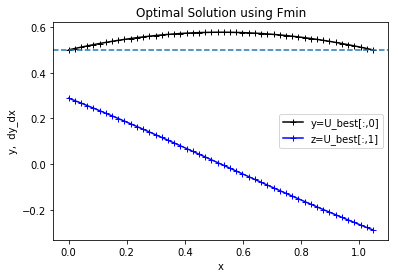

In [37]:
# Having found the value of lambda, now integrate and plot results
x=np.linspace(0,np.pi/3) # times for plotting

# Compute the final U values using the optimised lambda we found above
ic = np.array( [0.5, dy_dx_initial_Optimal['x'] ]) # init cond
U_final = integrate.odeint(derivatives, ic, x)

# Plot the results
plt.plot(x,U_final[:,0],'k+-')
plt.plot(x,U_final[:,1],'b+-')
plt.axhline(y=0.5, linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y,  dy_dx')
plt.title("Optimal Solution using minimise")
plt.legend(('y=U_best[:,0]', 'z=U_best[:,1]'), loc='center right')

## 3 EXERCISES:



## 3.1Use minimisation version of the shooting method to solve $y''+4y=0$ where $y(0)=1$ and $y'(\pi)=2$

Solve $y''+4y=0$ using the boundary conditions
$y(0)=1$ and $y'(\pi)=2$. 

Remember that you need to start by converting this second order ODE to a set of coupled 1st order ODEs.

You can solve this problem analytically. 

Do so and compare your analytical solution with your Python one.

In [ ]:
## Modify the code below:

def derivatives(U,t):
    y = ...
    z = ...
    dy_dt = ...
    dz_dt = ...
    return [..., ...]

In [ ]:
t  = np.linspace(... , ...)      ## times -- only want start and end values

def integrate_sqr( ... ):
   """ function to be used by minimize which squares result 
   of function F ("module" variable) minus 0.5 at pi/3 
   when integrated from 0 with initial condtions 
   of 0.5, init_vel """
   ic = np.array([ ... , ... ])    ## initial conditions
   U  = integrate.odeint( ... , ... , ...) # do the integration
   return (U[-1,1] - ... ) **...         # want distance^2 at end from 0.5

lambda_0 = 2.; # first guess for lambda (the initial velocity)

# Use minimize to find the value of lambda that match the distance BC
lambda_fmin = optimize.minimize( ... , ... ) 

# Print the solution
print( "Lambda (fmin) = ", str(lambda_fmin['x']) )

In [ ]:
# Now do the integration with the best fitting value so we can plot the result
ic_best = np.array([ ... , ... )
U = integrate.odeint( ... , ... , ...)

plt.plot(t, U[:,0], t, U[:,1] )
plt.xlabel('Time')
plt.ylabel('z')
plt.title("Final Value")
plt.legend(('y = U [:,0]', "dy_dt = U [:,1]"), loc='lower right')

plt.axhline(y=2, color='green', linestyle='--')
plt.axvline(x=np.pi, color='green', linestyle='--')

Lambda (fmin) =  [2.]


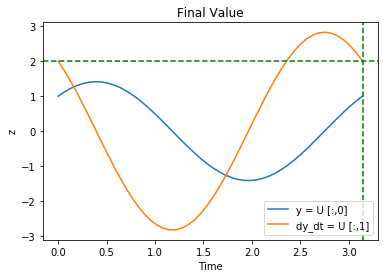

In [10]:
# MY SOLUTION

def derivatives(U,t):
    y = U[0]
    z = U[1]
    dy_dt = z
    dz_dt = -4*y
    return [du_dt, dz_dt]

t  = np.linspace(0, np.pi)      ## times -- only want start and end values

def integrate_sqr(lambda_0):
   """ function to be used by minimize which squares result 
   of function F ("module" variable) minus 0.5 at pi/3 
   when integrated from 0 with initial condtions 
   of 0.5, init_vel """
   ic = np.array([1, lambda_0])    ## initial conditions
   U  = integrate.odeint(derivatives, ic ,t) # do the integration
   return (U[-1,1] - 2)**2         # want distance^2 at end from 0.5.  (NOTE: the z[-1,0] picks the final value!)

lambda_0 = 2.; # first guess for lambda (the initial velocity)

# Use minimize to find the value of lambda that match the distance BC
lambda_fmin = optimize.minimize(integrate_sqr, lambda_0) 

# Print the solution
print( "Lambda (fmin) = ", str(lambda_fmin['x']) )

# Now do the integration with the best fitting value so we can plot the result
ic_best = np.array([1,lambda_fmin['x']])
U = integrate.odeint(derivatives, ic_best, t)

plt.plot(t, U[:,0], t, U[:,1] )
plt.xlabel('Time')
plt.ylabel('z')
plt.title("Final Value")
plt.legend(('y = U [:,0]', "dy_dt = U [:,1]"), loc='lower right')

plt.axhline(y=2, color='green', linestyle='--')
plt.axvline(x=np.pi, color='green', linestyle='--')

## 3.2 The same with `fsolve`

Now modify the solution above to work with `fsolve` instead of minimising the funciton.